### Preparation

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
"""
!unzip '/content/gdrive/MyDrive/EQ2445/Pytorch_Classification_Intergration/my_data/Master project data.zip' -d '/content/gdrive/MyDrive/EQ2445/Pytorch_Classification_Intergration/my_data'
"""

Archive:  /content/gdrive/MyDrive/EQ2445/Pytorch_Classification_Intergration/my_data/Master project data.zip
  inflating: /content/gdrive/MyDrive/EQ2445/Pytorch_Classification_Intergration/my_data/Master project data/data_label.csv  
  inflating: /content/gdrive/MyDrive/EQ2445/Pytorch_Classification_Intergration/my_data/__MACOSX/Master project data/._data_label.csv  
replace /content/gdrive/MyDrive/EQ2445/Pytorch_Classification_Intergration/my_data/Master project data/data_org_image/GfIraxmb.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/gdrive/MyDrive/EQ2445/Pytorch_Classification_Intergration/my_data/Master project data/data_org_image/GfIraxmb.png  
  inflating: /content/gdrive/MyDrive/EQ2445/Pytorch_Classification_Intergration/my_data/__MACOSX/Master project data/data_org_image/._GfIraxmb.png  
replace /content/gdrive/MyDrive/EQ2445/Pytorch_Classification_Intergration/my_data/Master project data/data_org_image/P9giY4n0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: a

In [2]:
import numpy as np
from collections import Counter

In [3]:
!pip install torchtoolbox

     |████████████████████████████████| 84 kB 2.6 MB/s 
     |████████████████████████████████| 3.1 MB 13.2 MB/s 
     |████████████████████████████████| 3.3 MB 44.9 MB/s 
     |████████████████████████████████| 59 kB 6.6 MB/s 
     |████████████████████████████████| 596 kB 53.0 MB/s 
     |████████████████████████████████| 895 kB 65.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
! pip install -U albumentations

     |████████████████████████████████| 102 kB 9.4 MB/s 
     |████████████████████████████████| 47.6 MB 33 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
def partition_data(file='/content/gdrive/MyDrive/EQ2445/Pytorch_Classification_Intergration/my_data/Master project data/data_labels_test.csv', ratios=[0.80, 0.20], out_path='/content/gdrive/MyDrive/EQ2445/Pytorch_Classification_Intergration/my_data/Master project data/', uniform=False):
    """
    Partition data into training, validation and test data. Saves partitioned data
    to three .csv files.
    """

    # Define ratios for traning, validation and test
    ratio_train = ratios[0]
    ratio_test = ratios[1]

    # Import data
    data = np.genfromtxt(file, skip_header=1, dtype='str', delimiter=',')

    # Divide by image and label
    imgs = data[:,0]
    lbls = data[:,1]

    idxs_shuffle = np.random.permutation(len(lbls))
    imgs = imgs[idxs_shuffle]
    lbls = lbls[idxs_shuffle]

    # Print info
    print('NUMBER OF SAMPLES')
    samples_per_class(lbls)
    print('')

    # If uniformly many classes (do not use all data however)
    if uniform:
        # Find indices of each class
        idxs0 = np.where(lbls=='0')
        idxs1 = np.where(lbls=='1')
        idxs2 = np.where(lbls=='2')

        # Find number of samples for each class
        N0 = len(idxs0[0])
        N1 = len(idxs1[0])
        N2 = len(idxs2[0])
        N = min(N0, N1, N2)

        # Divide data by classes
        imgs0 = imgs[idxs0]
        lbls0 = lbls[idxs0]
        imgs1 = imgs[idxs1]
        lbls1 = lbls[idxs1]
        imgs2 = imgs[idxs2]
        lbls2 = lbls[idxs2]

        # Shuffle order
        idxs_shuffle0 = np.random.permutation(N0)
        idxs_shuffle1 = np.random.permutation(N1)
        idxs_shuffle2 = np.random.permutation(N2)
        imgs0 = imgs0[idxs_shuffle0]
        lbls0 = lbls0[idxs_shuffle0]
        imgs1 = imgs1[idxs_shuffle1]
        lbls1 = lbls1[idxs_shuffle1]
        imgs2 = imgs2[idxs_shuffle2]
        lbls2 = lbls2[idxs_shuffle2]

        # Take samples from each class
        imgs = []
        lbls = []
        for n in range(N):
            imgs.append(imgs0[n])
            lbls.append(lbls0[n])
            imgs.append(imgs1[n])
            lbls.append(lbls1[n])
            imgs.append(imgs2[n])
            lbls.append(lbls2[n])

    # Divide into training, validation and test data sets
    idxs_train = int(ratio_train*len(imgs))
    idxs_test = int((ratio_train+ratio_test)*len(imgs))
    imgs_train = imgs[0:idxs_train]
    imgs_test = imgs[idxs_train:]
    lbls_train = lbls[0:idxs_train]
    lbls_test = lbls[idxs_train:]

    # Save to files
    np.savetxt(out_path+'data_labels_test_attack_train.csv', np.vstack((imgs_train, lbls_train)).T, delimiter=',', fmt='%s')
    np.savetxt(out_path+'data_labels_test_attack_test.csv', np.vstack((imgs_test, lbls_test)).T, delimiter=',', fmt='%s')

    # Print information
    print('PARTITIONED DATA')
    print('  Training:    ' + str(int(100*ratios[0]))+'%, ' + str(len(lbls_train)) + ' samples')
    samples_per_class(lbls_train)
    print('')
    print('  Testing:     ' + str(int(100*ratios[1]))+'%, ' + str(len(lbls_test)) + ' samples')
    samples_per_class(lbls_test)
    print('')
    print('  Total:       ' + str(len(lbls_train)+len(lbls_test)))


def samples_per_class(lbls):
    counter = Counter(lbls)
    keys = counter.keys()
    values = counter.values()
    pairs = sorted(zip(keys, values))
    sum = 0
    output_format = '    Class {:<1}: {:>5}   {:>3}%'
    for pair in pairs:
        sum += pair[1]
    for pair in pairs:
        print(output_format.format(pair[0], pair[1], int(100*pair[1]/sum)))
    print('    Total:   {:>5}'.format(sum))

In [ ]:
partition_data()

NUMBER OF SAMPLES
    Class 0:    49    27%
    Class 1:    44    24%
    Class 2:    84    47%
    Total:     177

PARTITIONED DATA
  Training:    80%, 141 samples
    Class 0:    44    31%
    Class 1:    33    23%
    Class 2:    64    45%
    Total:     141

  Testing:     20%, 36 samples
    Class 0:     5    13%
    Class 1:    11    30%
    Class 2:    20    55%
    Total:      36

  Total:       177


### Test

In [22]:
!python "/content/gdrive/MyDrive/EQ2445/Pytorch_Classification_Intergration/deepfool.py"

###
6tjqTU40.png
2 0
###
YQ6ZnSa9.png
0 2
###
2VQo3H65.png
2 0
###
CfPTRl6j.png
2 0
###
fjrXsF3n.png
2 0
###
7BZNvSaM.png
2 0
###
62nJed4c.png
2 0
###
falmq1rX.png
2 0
###
CEUGhXtk.png
1 2
###
f93Aapmi.png
2 0
###
MrAxvgDj.png
2 0
###
TLjnY12Z.png
2 0
###
PWhQANIn.png
2 0
###
LQjdkzGi.png
2 0
###
S3a0ngkA.png
0 2
###
7ISj1AcO.png
2 0
###
jr2kV5hN.png
2 0
###
WPIZ9b6L.png
1 2
###
7i1P3cko.png
2 0
###
8Dsw9gkG.png
2 0
###
xRkwMgWJ.png
0 2
###
b9xT0I4P.png
0 2
###
1jfoIbJN.png
2 2
###
NS8wPYXJ.png
0 2
###
sC4GFu9d.png
2 0
###
s8wLVpUS.png
0 2
###
rHZuS9Yn.png
2 0
###
4guqcrI3.png
2 0
###
02jv7G1P.png
0 2
###
kHZv582j.png
2 2
###
YqcPejFT.png
2 0
###
qF0uwSWH.png
0 2
###
SFoZqKRu.png
2 0
###
fgh3VTb9.png
0 2
###
SkozMUWV.png
2 2
###
ZPfFY1yO.png
2 0
###
P9ZIHuYB.png
2 0
###
shPHRLGp.png
2 2
###
apAvYs0i.png
2 0
###
B6n3CYi9.png
0 2
###
B3OFi1A6.png
2 0
###
sBUqtcoh.png
1 2
###
pWVoURSf.png
2 0
###
RozmuO7M.png
0 2
###
mROaLhFy.png
2 2
###
jkm6Swxr.png
2 0
###
sB1uKQM5.png
2 1
###
dn8egJ9i.

In [ ]:
"""
The failed fooling attempts:
1jfoIbJN.png
2 2
kHZv582j.png
2 2
SkozMUWV.png
2 2
shPHRLGp.png
2 2
mROaLhFy.png
2 2
XgmLGA0i.png
2 2
N6EMjFbi.png
2 2
UR5lTZJM.png
2 2
sqFuGPrg.png
2 2
1fa3wZcl.png
2 2
iMcaFIuG.png
2 2
JeXn8ua3.png
2 2
q2epbHoC.png
2 2
Gpxv4Uzd.png
2 2
S8tKkAlL.png
2 2
8NZ4Bquh.png
2 2
"""

### Analysis

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

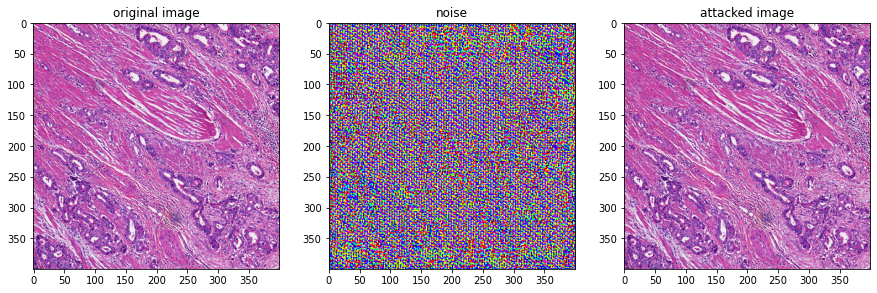

In [33]:
image_o = Image.open('/content/gdrive/MyDrive/EQ2445/Pytorch_Classification_Intergration/my_data/Master project data/pert_image/ori_f3tU12q8.png')
image_r = Image.open('/content/gdrive/MyDrive/EQ2445/Pytorch_Classification_Intergration/my_data/Master project data/pert_image/r_f3tU12q8.png')
image_p = Image.open('/content/gdrive/MyDrive/EQ2445/Pytorch_Classification_Intergration/my_data/Master project data/pert_image/pert_f3tU12q8.png')
f = plt.figure()
f.set_figheight(15)
f.set_figwidth(15)
a1 = f.add_subplot(1,3,1)
a1.title.set_text("original image")
a1.imshow(image_o)
a2 = f.add_subplot(1,3,2)
a2.title.set_text("noise")
a2.imshow(image_r)
a3 = f.add_subplot(1,3,3)
a3.title.set_text("attacked image")
a3.imshow(image_p)